In [22]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

import seaborn as sns

%matplotlib inline

test image size ->  (720, 1280, 3)
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


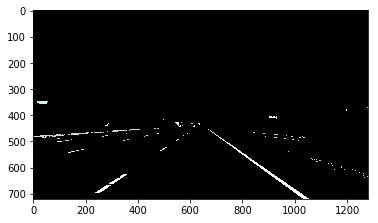

In [8]:

# Read in the image
image = mpimg.imread('test.jpg')

print("test image size -> ",image.shape)
# Grab the x and y size and make a copy of the image
xsize, ysize = image.shape[:2]

color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
# 200 200 200 white balance
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds

# if image less than white image, black out....
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])

print(thresholds)
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()


xsize 1280
ysize 720
[  -0.64222222  539.        ]
[  0.64222222 -39.        ]
[ -6.31593543e-17   5.39000000e+02]


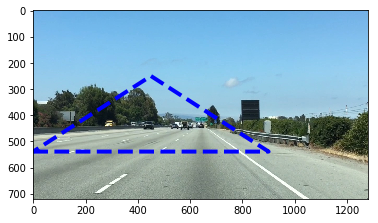

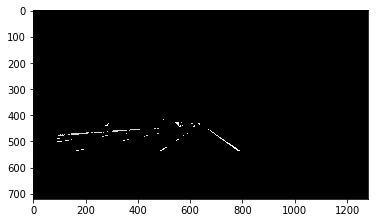

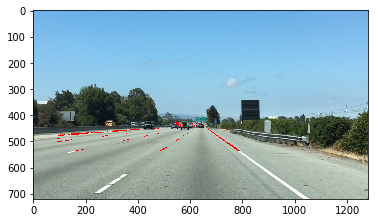

In [14]:

# Read in the image
image = mpimg.imread('test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

print("xsize",xsize)
print("ysize",ysize)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [450, 250]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print(fit_left)
print(fit_right)
print(fit_bottom)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)

x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.show()
plt.imshow(color_select)
plt.show()
plt.imshow(line_image)
plt.show()

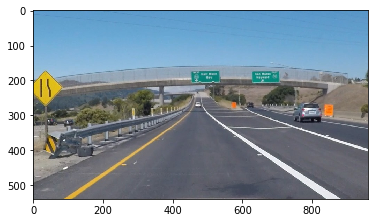

In [101]:
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)


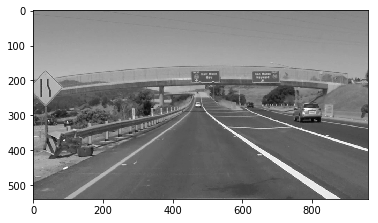

In [18]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')

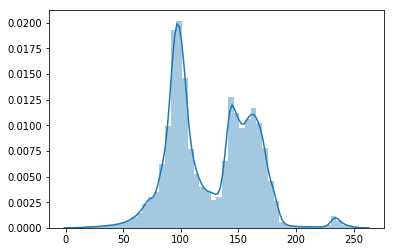

In [23]:
sns.distplot(gray.ravel())

In [76]:
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

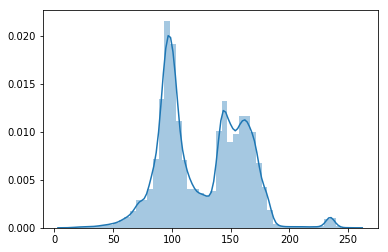

In [77]:
sns.distplot(blur_gray.ravel())

In [84]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

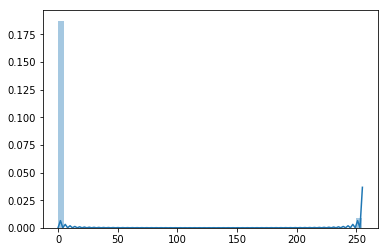

In [85]:
sns.distplot(edges.ravel())

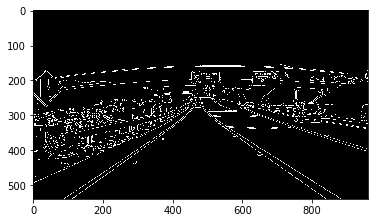

In [86]:
plt.imshow(edges,cmap="Greys_r")

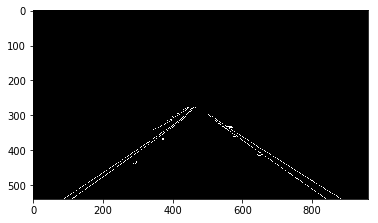

In [161]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(50,imshape[0]),(450, 270), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

plt.imshow(masked_edges,cmap="Greys_r")

In [155]:
rho = 1
theta = np.pi/180
threshold = 20
min_line_length = 40
max_line_gap = 20
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [156]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        print(x1,y1,x2,y2)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

571 344 881 538
89 539 440 302
525 318 839 538
112 538 344 375
513 311 820 526
315 346 474 265
538 322 633 382
274 363 423 281
235 388 285 364
133 510 397 332
350 369 419 320
208 470 371 355
340 344 399 314
313 346 388 307
402 296 463 264
412 293 472 263
389 315 473 268
296 352 423 282
384 292 452 291
395 286 453 288
397 298 464 261
500 297 556 332
406 329 459 278
291 352 367 308
113 538 237 451
386 291 465 259
263 375 315 353
479 267 548 339
542 331 598 334
299 352 373 313
420 319 479 266
457 254 532 326
422 289 486 277
285 367 338 344
312 343 456 256
448 263 520 301
546 334 604 337
290 355 381 294
388 295 457 255
358 326 476 268
309 343 415 277
479 269 547 339
469 263 520 314
328 339 374 315
288 355 414 277
320 342 368 314
312 346 368 312
378 348 431 310


In [157]:
color_edges = np.dstack((edges, edges, edges)) 

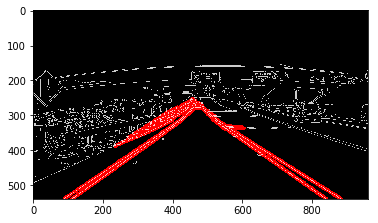

In [158]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)